# Image Rotation and Translation


In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. Image Rotation using OpenCV

Chúng ta có thể quay image với một góc $\theta$ với ma trận M như sau:

<p align='center'>
<img src='../assets/images/rotation_1.png'/>
</p>

Ngoài ra OpenCV cũng cho phép define tâm để quay ảnh và scale factor để resize image với matrix như sau:

![](../assets/images/rotation_2.png)

Với các tham số:

- $\alpha$ = scale. cos $\theta$
- $\beta$ = scale. sin $\theta$
- `cx` và `cy` là tọa độ tâm quay

OpenCV dùng hàm `getRotationMatrix2D()` để tạo ra transformation matrix trên.

### a) getRotationMatrix2D

**Syntax:**

```python
getRotationMaxtrix2D(center, angle, scale)
```

Trong đó: 

- `center`: tâm quay của input image
- `angle`: góc quay
- `scale`: scale up hoặc down để resize image

Với `angle` > 0 thì image quay theo chiều kim đồng hồ và `angle` < 0 thì quay theo chiều ngược lại

Rotation gồm 3 step operation:

1. Đầu tiên, cần lấy ra tâm quay. Thường sẽ là tâm của chính bức ảnh
2. Tiếp theo, tạo 2D- rotation matrix. Dùng hàm `getRotationMatrix2D`
3. Cuối cùng, apply affine transfomation cho ảnh, sử dụng ma trận quay tạo từ bước trước. Sử dụng hàm `warpAffine()` của OpenCV

### b) warpAffine

**Syntax của hàm warpAffine:**

```python
warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
```

Trong đó: 

- `src`: source của image hoặc image
- `M`: transformation matrix
- `dsize`: size của ouput image
- `dst`: đường dẫn của output image
- `flags`: kết hợp của interpolation methods: `INTER_LINEAR` hoặc `INTER_NEAREST`
- `borderMode`: the pixel extrapolation method
- `borderValue`: giá trị độ dày của border, default là 0


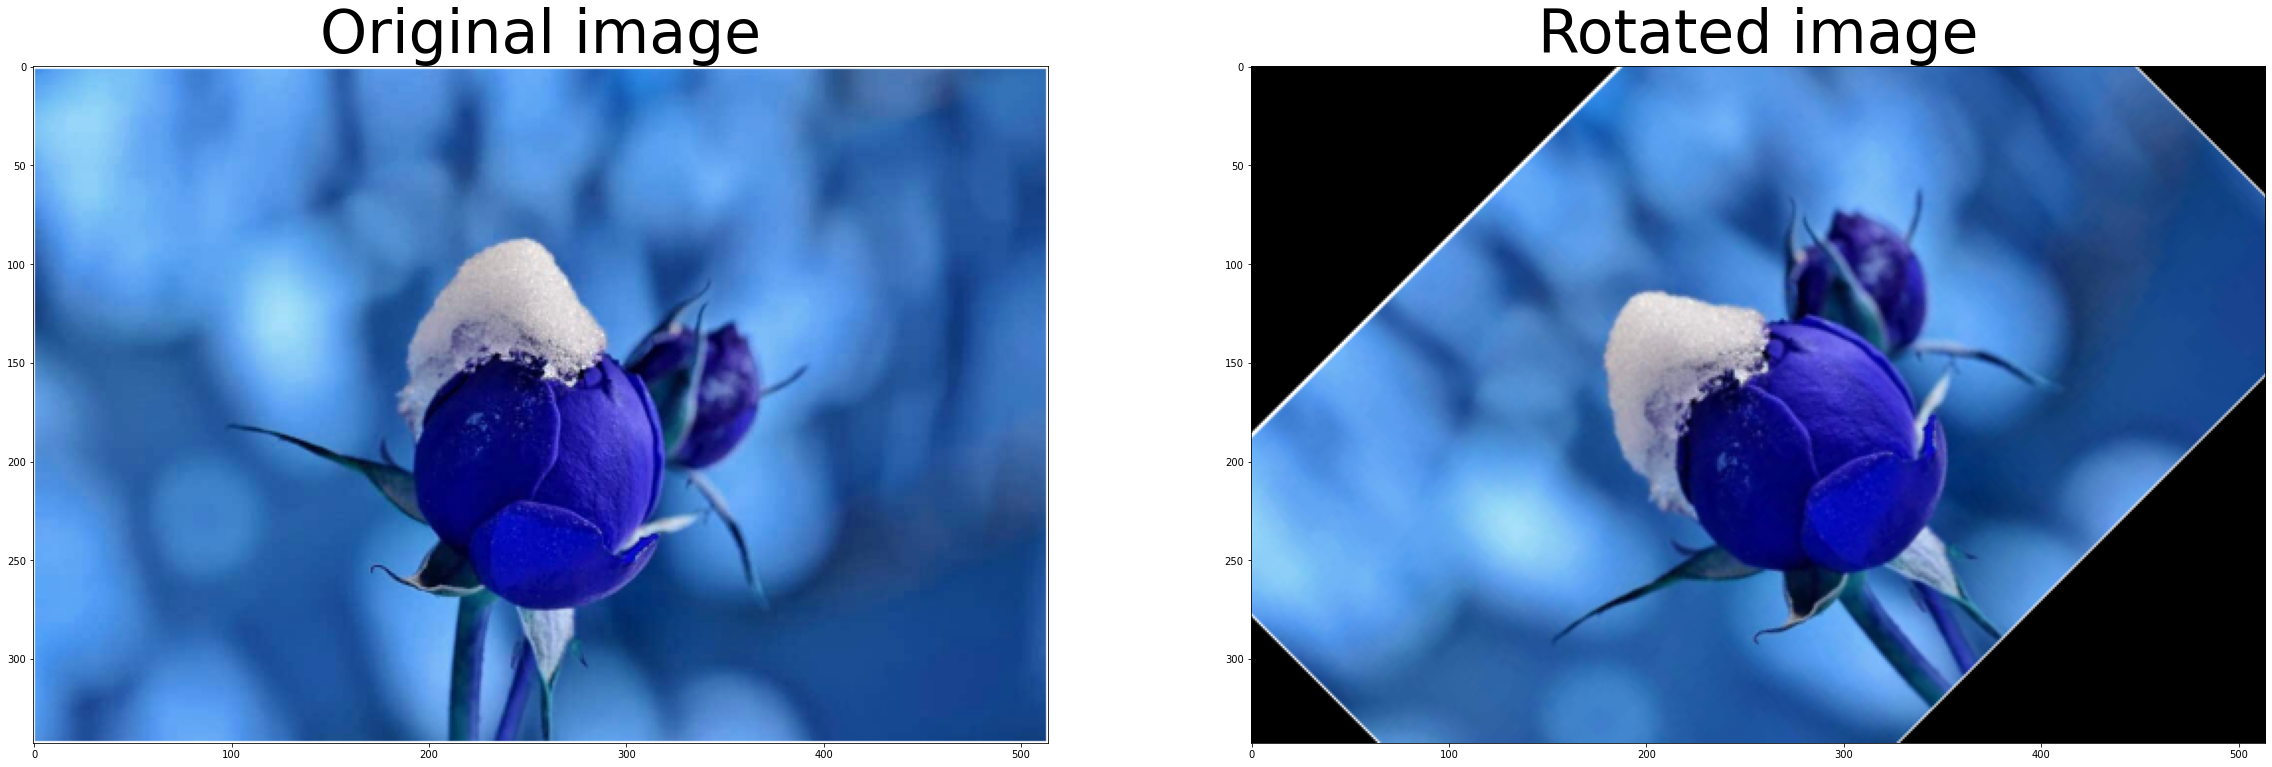

True

In [9]:
image = cv2.imread('../assets/images/example_img.png')

# Dividing height and width by 2 to get the center of the image
height, width = image.shape[:2]
center = (width/2, height/2)

# use cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)

# Rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))


# show image
plt.rcParams['figure.figsize'] = (40, 40)
plt.rcParams['axes.titlesize'] = 60
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title('Rotated image')
plt.show()

cv2.imwrite('rotated_image.jpg', rotated_image)

## 2. Translation of Images using OpenCV

Để translation images trong toán học ta có thể apply ma trận M :

![](../assets/images/translation_1.png)

Trong đó `tx, ty` như sau:

- `tx` > 0 sẽ shift image sang phải và ngược lại nếu `tx` < 0
- `ty` > 0 sẽ shift image xuống và ngược lại nếu `ty` < 0

Ta có các bước để translation images:

1. Đầu tiên, đọc ảnh và lấy ra width, height
2. Tiếp theo, tạo transformation matrix - 2D array. Ma trận này contains info cần để shift image theo trục x và y
3. Cuối cùng, dùng `warpAffine()` để apply transformation

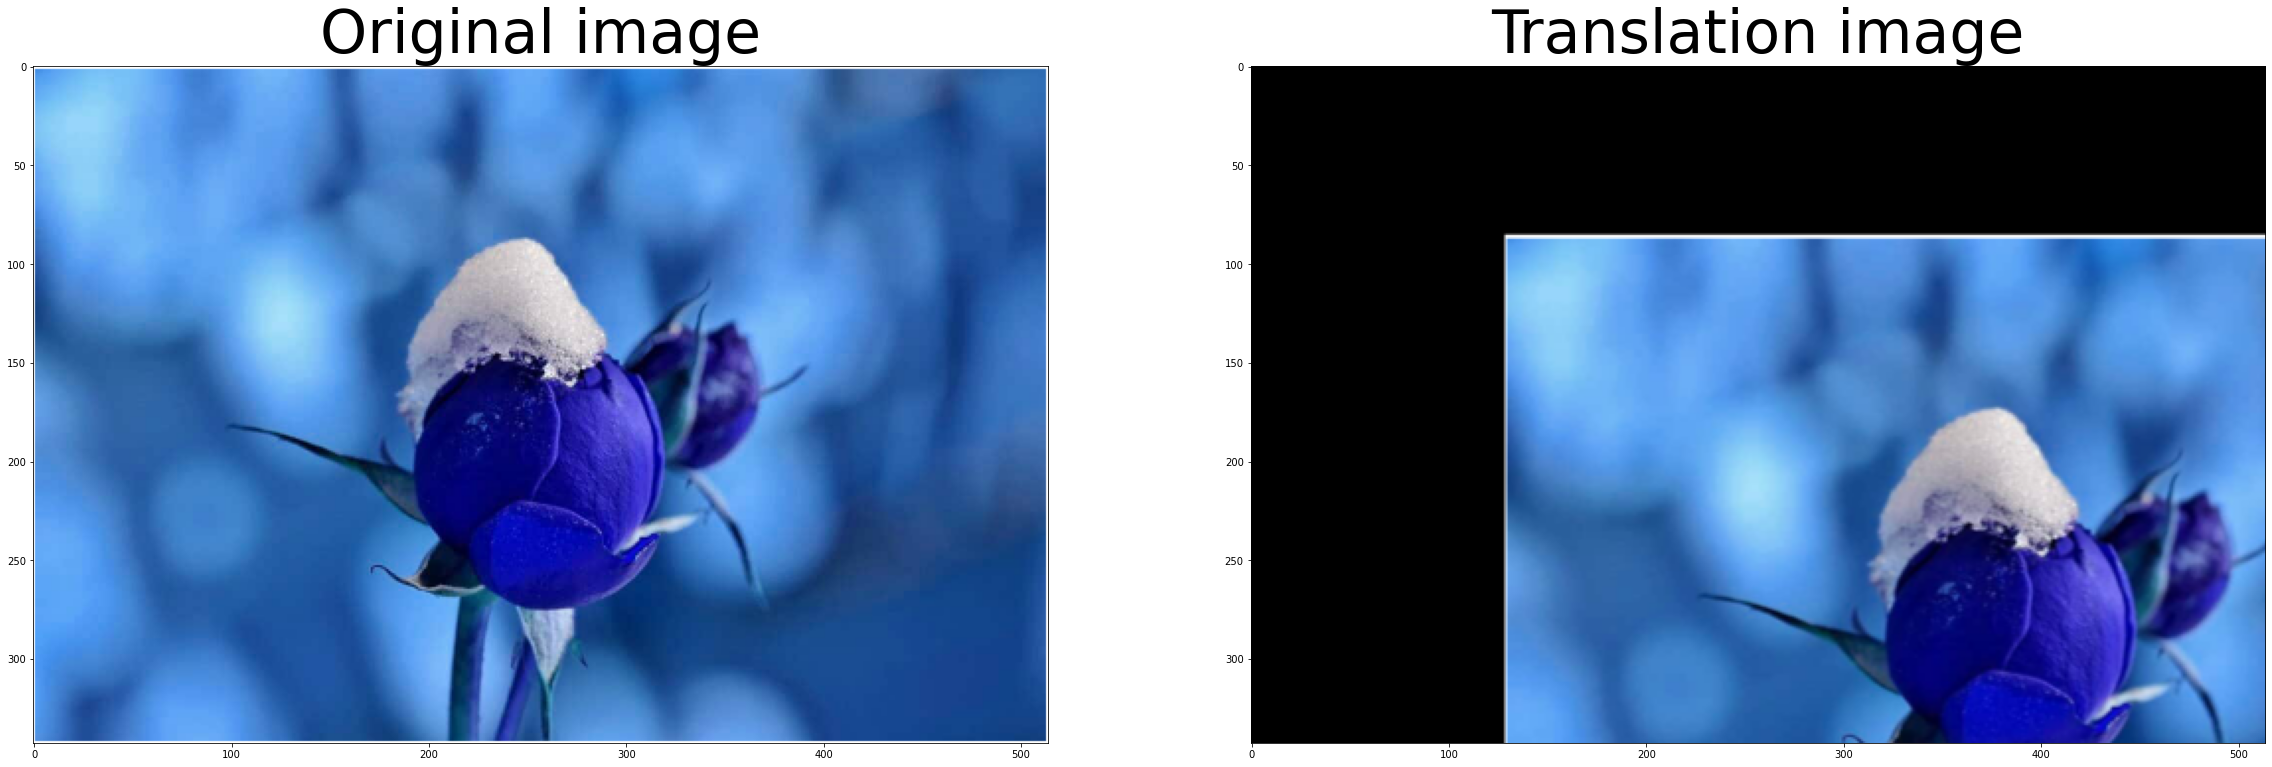

True

In [18]:
# Get tx and ty values for translation
# we can specify any value of our choice

tx, ty = width/4, height/4

# Create translation matrix using tx, ty
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

# apply the translation to the image
translation_image = cv2.warpAffine(src=image, M=translation_matrix, dsize=(width, height))

# display image
# show image
# plt.rcParams['figure.figsize'] = (40, 40)
# plt.rcParams['axes.titlesize'] = 60
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(translation_image)
plt.title('Translation image')
plt.show()

cv2.imwrite('translation_image.jpg', translation_image)